# Scaling Laws

In [14]:
import numpy as np
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [15]:
gpt_models = {
    'gpt-0':    dict(n_layer=2, n_head=2, n_embd=96),     # ~0.25M params
    'gpt-1':    dict(n_layer=4, n_head=4, n_embd=96),     # ~0.45M params
    'gpt-2':    dict(n_layer=9, n_head=8, n_embd=96),     # ~1M params
    'gpt-3':    dict(n_layer=10, n_head=8, n_embd=128),   # ~2M params
    'gpt-4':    dict(n_layer=20, n_head=16, n_embd=128),  # ~4.00M params
}

# Task 1: 

model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=None, vocab_size=None, dropout=dropout)

model_args['vocab_size'] = 95 # from perpare.py

gpt_cfg = GPTConfig(**model_args)

model = GPT(gpt_cfg)

num_params = model.get_num_params()

print('num_params:', num_params)

# Task 2:

$C \approx 6ND $ where $D=S*B*C_L$ with training steps $S$, batch size $B$, and context length $C_L$.

# Task 3:

In [16]:
model_size_c0 = [0.25*10**6, 0.5*10**6, 1*10**6, 2*10**6]
train_loss_c0 = [1.810, 1.773, 1.788, 1.840]

model_size_c1 = [0.5*10**6, 1*10**6, 2*10**6]
train_loss_c1 = [1.639, 1.615, 1.628]

model_size_c2 = [0.5*10**6,1*10**6, 2*10**6, 4*10**6]
train_loss_c2 = [1.621, 1.573, 1.561, 1.591]

In [17]:

# ------------------- C_0 -------------------
k = 2 # Degree of the spline. 
spline_c0 = make_interp_spline(model_size_c0, train_loss_c0, k=k)

x_c0 = np.linspace(min(model_size_c0), max(model_size_c0), 1000)
y_c0 = spline_c0(x_c0)

min_index_c0 = np.argmin(y_c0)

min_y_c0 = y_c0[min_index_c0]
min_x_c0 = x_c0[min_index_c0]
print(f"Minimum for C_0 spline at N = {min_x_c0}, L = {min_y_c0}")

# ------------------- C_1 -------------------
k = 2 
spline_c1 = make_interp_spline(model_size_c1, train_loss_c1, k=k)

x_c1 = np.linspace(min(model_size_c1), max(model_size_c1), 1000)
y_c1 = spline_c1(x_c1)

min_index_c1 = np.argmin(y_c1)

min_y_c1 = y_c1[min_index_c1]
min_x_c1 = x_c1[min_index_c1]
print(f"Minimum for C_1 spline at N = {min_x_c1}, L = {min_y_c1}")

# ------------------- C_2 -------------------
k = 2 
spline_c2 = make_interp_spline(model_size_c2, train_loss_c2, k=k)

x_c2 = np.linspace(min(model_size_c2), max(model_size_c2), 1000)
y_c2 = spline_c2(x_c2)

min_index_c2 = np.argmin(y_c2)

min_y_c2 = y_c2[min_index_c2]
min_x_c2 = x_c2[min_index_c2]
print(f"Minimum for C_2 spline at N = {min_x_c2}, L = {min_y_c2}")

Minimum for C_0 spline at N = 633633.6336336336, L = 1.767926172752666
Minimum for C_1 spline at N = 1340840.8408408407, L = 1.610294417540664
Minimum for C_2 spline at N = 1473973.9739739741, L = 1.5581717998723894


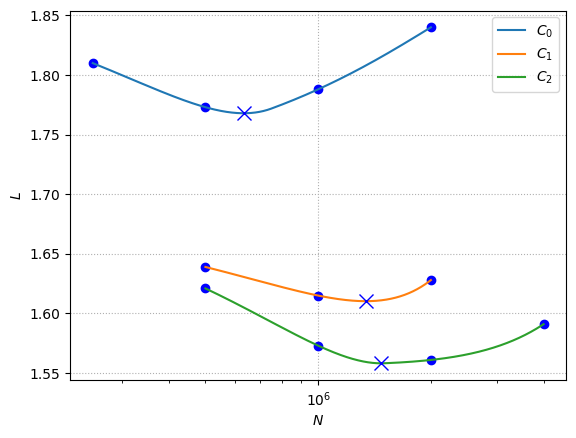

In [18]:
plt.figure()
plt.plot(model_size_c0, train_loss_c0, 'o', color = 'blue')
plt.plot(x_c0, y_c0, label = r'$C_0$')
plt.plot(min_x_c0, min_y_c0, 'x', color='blue', markersize=10)

plt.plot(model_size_c1, train_loss_c1, 'o', color = 'blue')
plt.plot(x_c1, y_c1, label = r'$C_1$')
plt.plot(min_x_c1, min_y_c1, 'x', color='blue', markersize=10)

plt.plot(model_size_c2, train_loss_c2, 'o', color = 'blue')
plt.plot(x_c2, y_c2, label = r'$C_2$')
plt.plot(min_x_c2, min_y_c2, 'x', color='blue', markersize=10)

plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$L$')
plt.legend()
plt.grid(True, linestyle = 'dotted')
plt.show()

In [19]:
compute_points = np.array([6*10**13, 3*10**14, 6*10**14])
model_sizes    = np.array([min_x_c0, min_x_c1, min_x_c2])
tokens = compute_points/(6*model_sizes)


def linear_fit(xs, ys):

    model = LinearRegression()
    model.fit(np.array(xs).reshape(-1, 1), np.array(ys).reshape(-1, 1))
    
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    return slope, intercept


In [20]:
slope, intercept = linear_fit(np.log(compute_points), np.log(model_sizes))

p_N, N_e = slope, np.exp(intercept) 
print(f"Our scaling law for N_opt as a function of C: N_opt(C) = {N_e:.2e} C^{p_N:.4f}")

slope, intercept = linear_fit(np.log(compute_points), np.log(tokens))

p_D, D_e = slope, np.exp(intercept) 
print(f"Our scaling law for D_opt as a function of C: D_opt(C) = {D_e:.2e} C^{p_D:.4f}")

domain = [10**(n) for n in range(13, 17)]

Our scaling law for N_opt as a function of C: N_opt(C) = 3.33e+00 C^0.3841
Our scaling law for D_opt as a function of C: D_opt(C) = 5.00e-02 C^0.6159


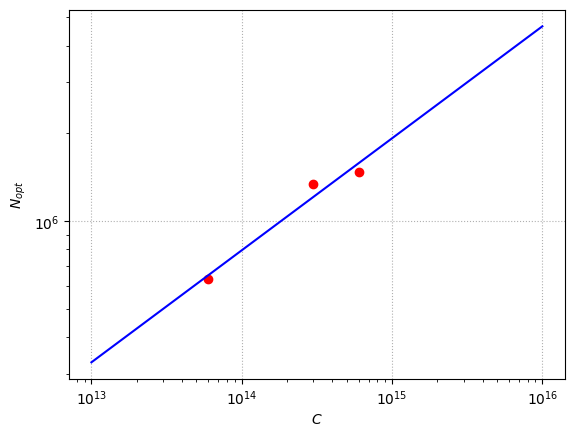

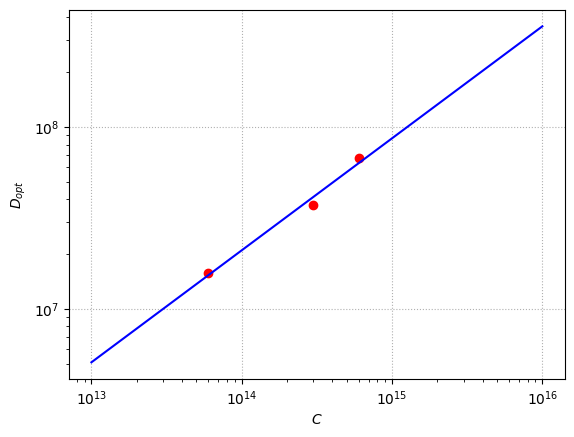

In [21]:

plt.figure()
plt.plot(compute_points,model_sizes, 'o', color = 'red')
plt.plot(domain, N_e*(np.array(domain)**p_N) , '-', color='blue')

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r'$C$')
plt.ylabel(r'$N_{opt}$')

plt.grid(True, linestyle = ':')
plt.savefig("scaling_law_N.png")
plt.show()

plt.figure()
plt.plot(compute_points, tokens , 'o', color = 'red')
plt.plot(domain, D_e*(np.array(domain)**p_D) , '-', color='blue')

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r'$C$')
plt.ylabel(r'$D_{opt}$')

plt.grid(True, linestyle = ':')
plt.savefig("scaling_law_D.png")
plt.show()

